In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = "../output_video/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

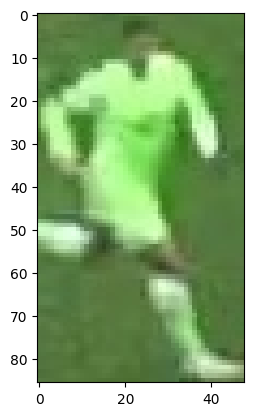

In [5]:
plt.imshow(image)
plt.show

# take the top half of the image

<function matplotlib.pyplot.show(close=None, block=None)>

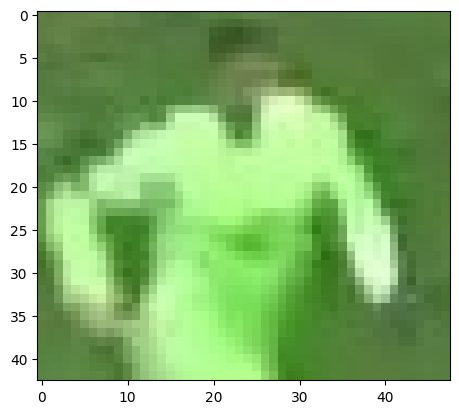

In [11]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show

# Cluster the image into two image

<function matplotlib.pyplot.show(close=None, block=None)>

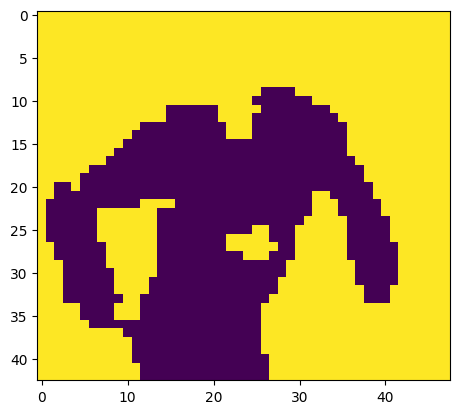

In [13]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

#perform the K-mean cluatring width 2 cluster
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit_predict(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the lables into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the clusted image
plt.imshow(clustered_image)
plt.show

In [14]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [15]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [17]:
kmeans.cluster_centers_[player_cluster]

array([171.11330698, 235.40316206, 142.52700922])